In [1]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
import matplotlib.pyplot as plt 
%matplotlib inline

print('x_train shape: ', x_train.shape)

# Output = x_train shape: (5000, 32, 32, 3)
# This means: 
# - 5000 images
# - 32x32 (height/width) dimensional images
# - 3 pixels in depth (corresponding to RGB)

x_train shape:  (50000, 32, 32, 3)


In [2]:
print('y_train shape: ', y_train.shape)

# Output: y_train shape: (5000, 1)

# That means there is one number (corresponding to the label) for each of the 5000 images 

y_train shape:  (50000, 1)


In [3]:
print(x_train[0])

# The output is the pixel numbers within the image 


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


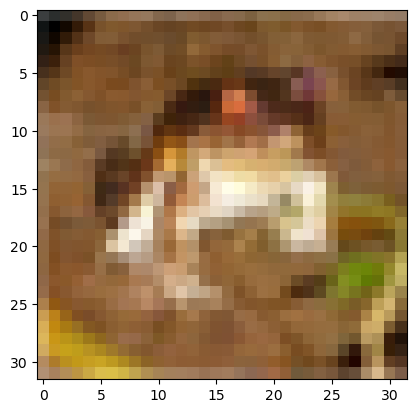

In [4]:
# %matplotlibb inline tells the notebbook that you wish for the image to display within the image. 
# img.plt.imshow is a function that displays the numbered pixel values x_train[0] to the actual image it represents. 

# The code for showing the image:
img = plt.imshow(x_train[0])

# The image is pixilated because it's been enlarged as its a 32x32 image.


In [5]:
# Working out what the label of the above image is: 

print('The label is: ', y_train[0])

# You can repeat the process above to see the different labels and images for the data
# In the lab there is a table that shows that 6 = a frog 

# The numbering is as follows: 

# 0 - Airplane 
# 1 - Automobile 
# 2 - bird
# 3 - cat
# 4 - deer
# 5 - dog
# 6 - frog 
# 7 - horse 
# 8 - ship 
# 9 - truck 

The label is:  [6]


In [6]:
# We need the labels to be ordered in some way.
# Lecture example: 

# If the network can't decide if the given image is a truck or airplane should we take 
# halfway point and predict it as a dog? Short answer, NO. 

# What we need is the probability of each of the 10 different classes. For that, we need 10 output neurons 
# in our network. One for each label 

# To do this, we convert the label into a set of 10 numbers where each number
# represents if the image bbelongs to a certain class or not.
# If an image belongs to the first class, the first number of this set will be a 1 and all other numbers set
# to 0.

# This process is called a "One Hot Encoding"
# There is an example of the conversion table in the lab task

In [7]:
# To do one-hot encoding on each label the code is as follows: 
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

# Testing the one-hot encoding:
# It is expected that the 6th item will be a 1 and the rest 0 as it is an image of a frog 
print('The one hot label is: ', y_train_one_hot[0])

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
# Processing our image (x)
# A common step we do is to allow the values between 0 and 1, which will aid in the training of our NN
# Since our pixel values already take the values between 0 and 255 we simply need to dived by 255

# In practice, what we do is convert the type to 'float32'
# float32 is a datatype that can store values with decimal points
# We then divide each cell by 255.  
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255 

## The areay produced by first training image with processing applied: 
# The array values have been normalized between 0 and 1 which is computationally easier to handle
print(x_train[0])



[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [9]:
"""""""""""""""""""""""""""""
BUILDING AND TRAINING OUR CNN
"""""""""""""""""""""""""""""

# The last layer of a CNN is a softmax layer 
# A softmax layer transforms the output of the previous layer into probability distributions for 
# classification purposes.

# For now, we will zero-pad our layer such that the output width and height will be the same 
# as the input width and height, we'll have to pad with a border of 1. 
# We will be applying 'same' padding for convolutional layers

# Lastly we will use ReLU activation for all our layers except 

'""\nBUILDING AND TRAINING OUR CNN\n'

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Parms for model.add()
# filter=3x3, stride_size=1 (in both dimensions), depth=32, padding=same, activation = relu
# The first layer needs an input size, subsequent layers do not due as they can infer this 
# from the first layer

# Params for Max Pooling 
# Pool size - the dimensions of the pooling dividers (2x2) in this case 
# stride - Default is 2 and that is what we will use thus we do not need to specify 

# Dropout layer is the prevent overfitting 
# In outcase 2.5 !!DO MORE RESEARCH!!

# Calling an empty Sequential Model
model = Sequential()
# Layer 1 (Convultional Layer)`
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2 (Convultional Layer)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Layer 3 (Max Pooling)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 4 (Dropout layer)
model.add(Dropout(0.25))
# Layer 5 - 8
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten the output to change the output from the previous layer 
# From a cube like structure to neurons in 1 row so it can be input to 1 layer 
model.add(Flatten())
# Dense Layer
model.add(Dense(512, activation='relu'))
# Dropout 
model.add(Dropout(0.5))
# Fully connected layer with 10 neurons as probbability distrubutions and a softax activation function 
model.add(Dense(10, activation='softmax'))

# Print the architecture 
model.summary()
          


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          1

2022-11-05 16:51:51.607883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 16:51:51.608323: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
# Copile the model made above: 

# - Categorical Cross entropy is applicable for a classification problem with many classes 
# - Optimizer is adam - Adam is simply a type of stochastic gradient descent (with modifications)
# - metrics - we want to compute the "accuracy of our model"

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


""""
Train our model with a batch size of 32
30 epochs
Validation test split of 0.2. This is a change to using validation_data and spliting our dataset manually as we did 
at the start
"""

hist = model.fit(x_train, y_train_one_hot, verbose=1, batch_size=32, epochs=20, validation_split=0.2)



Epoch 1/20
1250/1250 [==============================] - 87s 69ms/step - loss: 1.6941 - accuracy: 0.3710 - val_loss: 1.3087 - val_accuracy: 0.5227
Epoch 2/20
1250/1250 [==============================] - 93s 74ms/step - loss: 1.3231 - accuracy: 0.5245 - val_loss: 1.1031 - val_accuracy: 0.6057
Epoch 3/20
1250/1250 [==============================] - 91s 73ms/step - loss: 1.1680 - accuracy: 0.5816 - val_loss: 1.1064 - val_accuracy: 0.6066
Epoch 4/20
1250/1250 [==============================] - 86s 69ms/step - loss: 1.0651 - accuracy: 0.6217 - val_loss: 0.9197 - val_accuracy: 0.6741
Epoch 5/20
1250/1250 [==============================] - 97s 77ms/step - loss: 0.9890 - accuracy: 0.6518 - val_loss: 0.9056 - val_accuracy: 0.6835
Epoch 6/20
1250/1250 [==============================] - 91s 73ms/step - loss: 0.9380 - accuracy: 0.6718 - val_loss: 0.8454 - val_accuracy: 0.7033
Epoch 7/20
1250/1250 [==============================] - 85s 68ms/step - loss: 0.8997 - accuracy: 0.6820 - val_loss: 0.8302 -

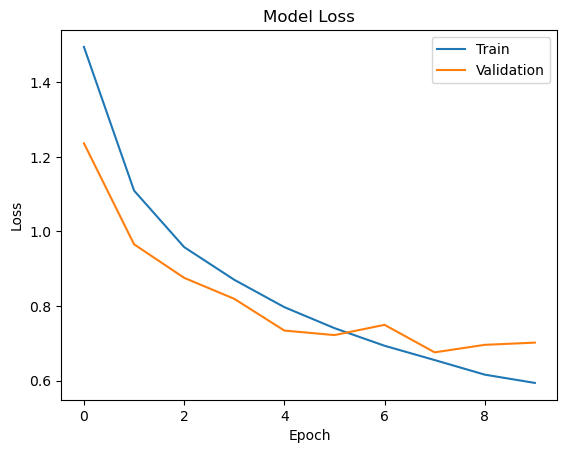

In [60]:
# Visualization of the Training Data 

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', "Validation"], loc='upper right')
plt.show()

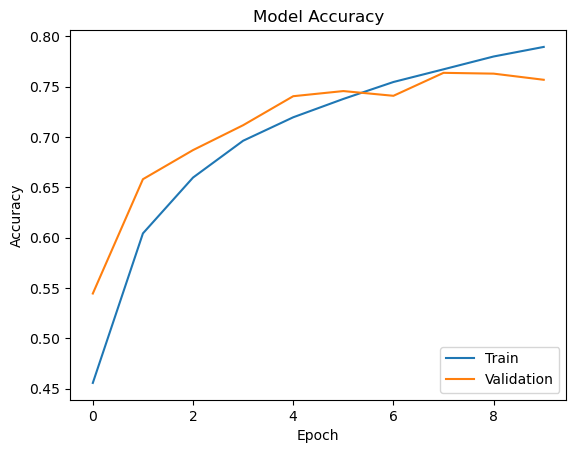

In [61]:
# Plotting the Accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', "Validation"], loc="lower right")
plt.show()

In [36]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.7653 - accuracy: 0.7663


0.7663000226020813